[View in Colaboratory](https://colab.research.google.com/github/shivamgoel1791/Other_projects/blob/master/Webcam_access_Python2.ipynb)

In [0]:
#try 1

In [7]:
from google.colab import files
uploaded = files.upload()

Saving DSC_0208.JPG to DSC_0208.JPG


In [0]:
import cv2

In [0]:
cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)

if vc.isOpened(): # try to get the first frame
    rval, frame = vc.read()
else:
    rval = False

while rval:
    cv2.imshow("preview", frame)
    rval, frame = vc.read()
    key = cv2.waitKey(20)
    if key == 27: # exit on ESC
        break
cv2.destroyWindow("preview")

In [0]:
#try 2

In [0]:
import cv2
import sys

In [27]:
cascPath = sys.argv[1]
faceCascade = cv2.CascadeClassifier(cascPath)

video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.cv.CV_HAAR_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

error: ignored

In [0]:
#try 3

In [0]:
#cascPath = sys.argv[1]
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface.xml')

video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
        #cv.CV_HAAR_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

In [0]:
#try 4

In [4]:
!pip install opencv-python
!apt update && apt install -y libsm6 libxext6
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import urllib2
import numpy as np

xmldata = urllib2.urlopen('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml').read()
file = open('haarcascade_frontalface.xml','w')
file.write(xmldata)
file.close()

Get:1 http://security.ubuntu.com/ubuntu artful-security InRelease [83.2 kB]
Hit:2 http://archive.ubuntu.com/ubuntu artful InRelease
Get:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease [74.6 kB]
Get:5 http://security.ubuntu.com/ubuntu artful-security/universe Sources [20.5 kB]
Get:6 http://security.ubuntu.com/ubuntu artful-security/main amd64 Packages [220 kB]
Get:7 http://archive.ubuntu.com/ubuntu artful-updates/universe Sources [43.2 kB]
Get:8 http://archive.ubuntu.com/ubuntu artful-updates/universe amd64 Packages [141 kB]
Get:9 http://security.ubuntu.com/ubuntu artful-security/universe amd64 Packages [77.6 kB]
Get:10 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 Packages [347 kB]
Fetched 1,096 kB in 1s (847 kB/s)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
12 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading 

In [0]:
def findfaces(fullurltoimage):
  f = urllib2.urlopen(fullurltoimage)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface.xml')
  image = np.asarray(bytearray(f.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(
      gray,
      scaleFactor=1.1,
      minNeighbors=5,
      minSize=(30, 30),
      flags = cv2.CASCADE_SCALE_IMAGE
  )
  print "------> Found {0} faces! <------ ".format(len(faces))

  for (x, y, w, h) in faces:
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 5)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image,extent=[300,500,0,1],aspect='auto')
  plt.grid(False)
  plt.axis('off')
  plt.show()

------> Found 4 faces! <------ 


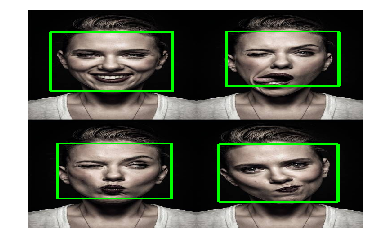

In [33]:
findfaces('https://i.pinimg.com/originals/e9/20/11/e92011b786737bacbb35b5594f1cbcae.jpg')